In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

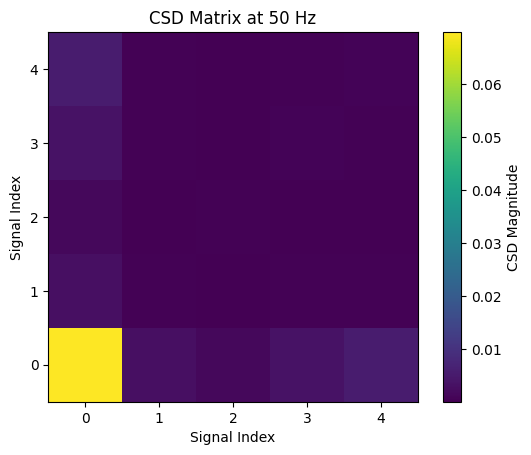

In [22]:
import numpy as np
from scipy.signal import csd

# Generate example signals
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time array
signals = [
    np.sin(2 * np.pi * 50 * t) + np.random.normal(0, 0.5, fs),  # Signal 1
    np.sin(2 * np.pi * 60 * t) + np.random.normal(0, 0.5, fs),  # Signal 2
    np.sin(2 * np.pi * 70 * t) + np.random.normal(0, 0.5, fs),  # Signal 3
    np.sin(2 * np.pi * 80 * t) + np.random.normal(0, 0.5, fs),  # Signal 4
    np.sin(2 * np.pi * 90 * t) + np.random.normal(0, 0.5, fs),  # Signal 5
]

# Number of signals
num_signals = len(signals)

# Initialize cross-spectral density matrix (as a dictionary of arrays for all frequencies)
csd_matrix = np.zeros((num_signals, num_signals), dtype=object)
frequencies = None

# Compute pairwise CSD
for i in range(num_signals):
    for j in range(i, num_signals):  # Use symmetry, compute only upper triangle
        f, Pxy = csd(signals[i], signals[j], fs=fs, nperseg=256)
        csd_matrix[i, j] = Pxy
        csd_matrix[j, i] = np.conj(Pxy)  # CSD symmetry: C_ij = conj(C_ji)
        if frequencies is None:
            frequencies = f  # Save frequencies for later use

# Convert matrix into a frequency-specific form
csd_matrix_at_freq = {freq: np.zeros((num_signals, num_signals), dtype=complex) for freq in frequencies}
for i, freq in enumerate(frequencies):
    for j in range(num_signals):
        for k in range(num_signals):
            csd_matrix_at_freq[freq][j, k] = csd_matrix[j, k][i]

# Example: Plot the magnitude of the CSD at a specific frequency
import matplotlib.pyplot as plt
selected_freq = 50  # Hz
idx = np.argmin(np.abs(frequencies - selected_freq))  # Find closest frequency index
csd_mag_at_selected_freq = np.abs(csd_matrix_at_freq[frequencies[idx]])

plt.imshow(csd_mag_at_selected_freq, cmap='viridis', origin='lower')
plt.colorbar(label="CSD Magnitude")
plt.title(f"CSD Matrix at {selected_freq} Hz")
plt.xlabel("Signal Index")
plt.ylabel("Signal Index")
plt.show()


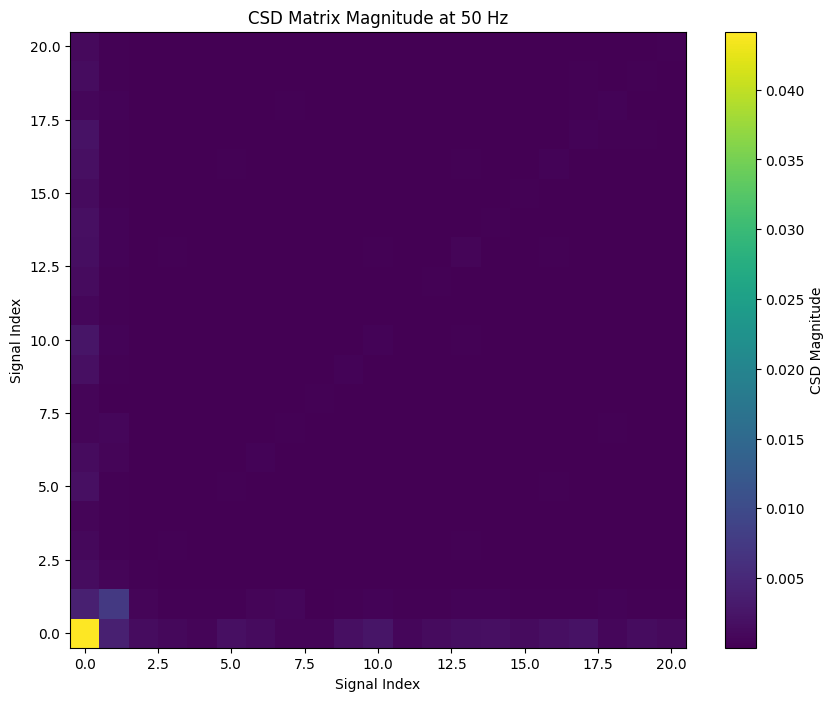

In [23]:
import numpy as np
from scipy.signal import csd

# Parameters
num_signals = 21
fs = 1500  # Sampling frequency in Hz
duration = 1  # Duration in seconds
t = np.linspace(0, duration, fs * duration, endpoint=False)  # Time array

# Generate 21 example signals
signals = [np.sin(2 * np.pi * (50 + i * 10) * t) + np.random.normal(0, 0.5, len(t)) for i in range(num_signals)]

# Initialize cross-spectral density matrix (dictionary to store arrays for each frequency)
csd_matrix = np.zeros((num_signals, num_signals), dtype=object)
frequencies = None

# Compute pairwise CSD for all signals
for i in range(num_signals):
    for j in range(i, num_signals):  # Use symmetry, compute only upper triangle
        f, Pxy = csd(signals[i], signals[j], fs=fs, nperseg=256)
        csd_matrix[i, j] = Pxy  # Store CSD
        csd_matrix[j, i] = np.conj(Pxy)  # Symmetry: C_ij = conj(C_ji)
        if frequencies is None:
            frequencies = f  # Save frequencies for later use

# Create frequency-specific CSD matrices
csd_matrix_at_freq = {freq: np.zeros((num_signals, num_signals), dtype=complex) for freq in frequencies}
for i, freq in enumerate(frequencies):
    for j in range(num_signals):
        for k in range(num_signals):
            csd_matrix_at_freq[freq][j, k] = csd_matrix[j, k][i]

# Example: Plot the CSD matrix at a specific frequency
import matplotlib.pyplot as plt
selected_freq = 50  # Frequency to visualize (Hz)
idx = np.argmin(np.abs(frequencies - selected_freq))  # Find closest frequency index
csd_mag_at_selected_freq = np.abs(csd_matrix_at_freq[frequencies[idx]])

plt.figure(figsize=(10, 8))
plt.imshow(csd_mag_at_selected_freq, cmap='viridis', origin='lower')
plt.colorbar(label="CSD Magnitude")
plt.title(f"CSD Matrix Magnitude at {selected_freq} Hz")
plt.xlabel("Signal Index")
plt.ylabel("Signal Index")
plt.show()


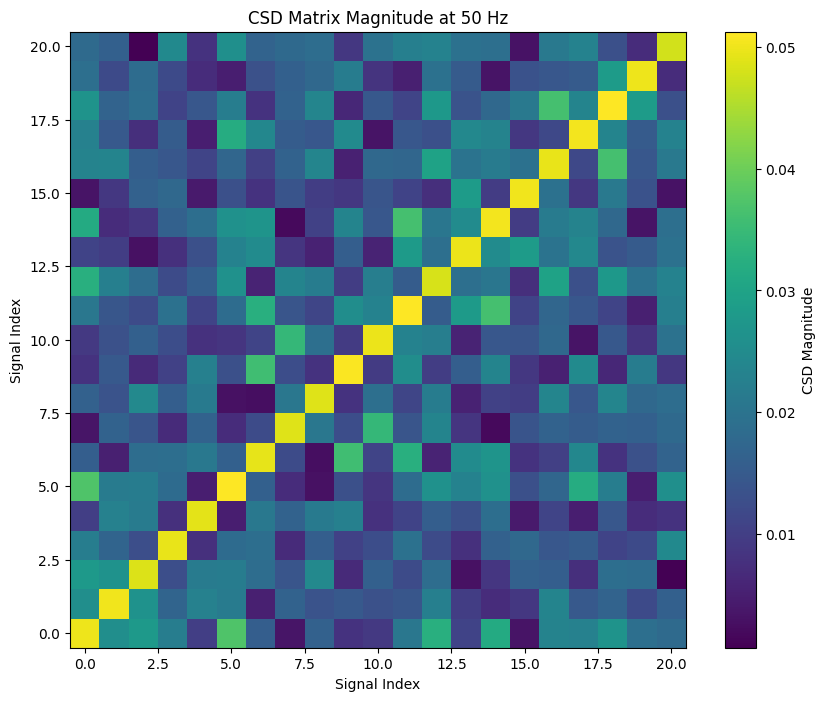

In [14]:
import numpy as np
from scipy.signal import csd
import scipy

# Parameters
num_signals = 21
fs = 1500  # Sampling frequency in Hz
duration = 1  # Duration in seconds
t = np.linspace(0, duration, fs * duration, endpoint=False)  # Time array
frequencies = np.linspace(0, 740, 74)  # 74 frequency components from 10 Hz to 740 Hz

# Generate multitone signals
signals = []
for i in range(num_signals):
    signal = sum(np.sin(2 * np.pi * f * t + np.random.uniform(0, 2 * np.pi)) for f in frequencies)
    signal += np.random.normal(0, 0.5, len(t))  # Add noise
    signals.append(signal)

# Compute pairwise Cross Spectral Density (CSD)
csd_matrix = np.zeros((num_signals, num_signals), dtype=object)
frequencies_csd = None
nperseg = 30
# Calculate CSD for all signal pairs
for i in range(num_signals):
    for j in range(i, num_signals):  # Compute only upper triangle
        f, Pxy = csd(signals[i], signals[j], fs=fs, nperseg=nperseg, noverlap=int(0.9 * nperseg), window = scipy.signal.get_window("boxcar", nperseg))
        csd_matrix[i, j] = Pxy
        csd_matrix[j, i] = np.conj(Pxy)  # Symmetry: C_ij = conj(C_ji)
        if frequencies_csd is None:
            frequencies_csd = f  # Save frequencies

# Create frequency-specific matrices
csd_matrix_at_freq = {freq: np.zeros((num_signals, num_signals), dtype=complex) for freq in frequencies_csd}
for freq_idx, freq in enumerate(frequencies_csd):
    for i in range(num_signals):
        for j in range(num_signals):
            csd_matrix_at_freq[freq][i, j] = csd_matrix[i, j][freq_idx]

# Visualize CSD Magnitude at a Specific Frequency
import matplotlib.pyplot as plt

selected_freq = 50  # Frequency to analyze
idx = np.argmin(np.abs(frequencies_csd - selected_freq))  # Find the closest frequency index
csd_mag_at_selected_freq = np.abs(csd_matrix_at_freq[frequencies_csd[idx]])

plt.figure(figsize=(10, 8))
plt.imshow(csd_mag_at_selected_freq, cmap='viridis', origin='lower')
plt.colorbar(label="CSD Magnitude")
plt.title(f"CSD Matrix Magnitude at {selected_freq} Hz")
plt.xlabel("Signal Index")
plt.ylabel("Signal Index")
plt.show()


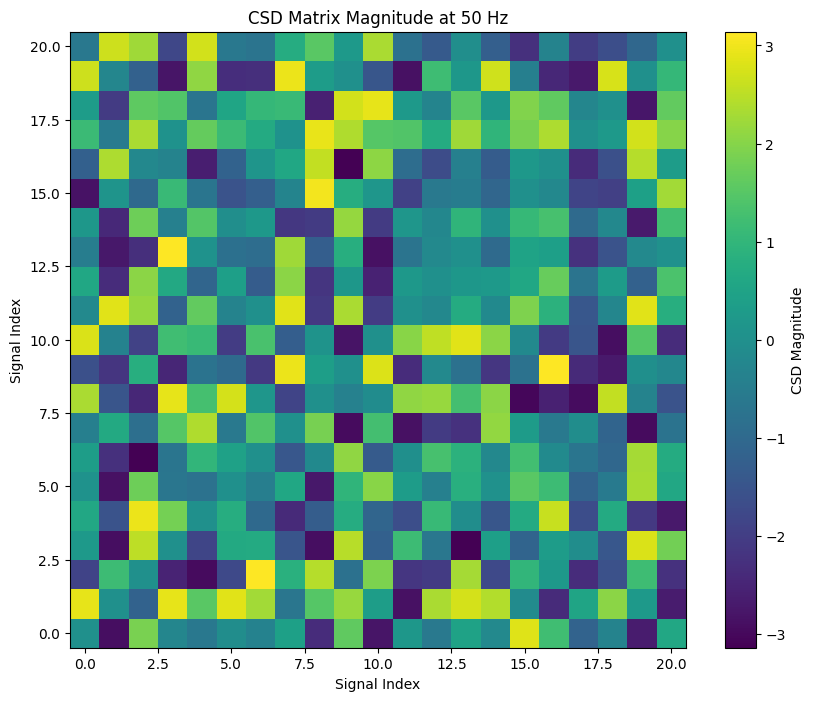

In [15]:
csd_mag_at_selected_freq = np.angle(csd_matrix_at_freq[frequencies_csd[idx]])

plt.figure(figsize=(10, 8))
plt.imshow(csd_mag_at_selected_freq, cmap='viridis', origin='lower')
plt.colorbar(label="CSD Magnitude")
plt.title(f"CSD Matrix Magnitude at {selected_freq} Hz")
plt.xlabel("Signal Index")
plt.ylabel("Signal Index")
plt.show()

In [16]:
csd_mag_at_selected_freq.shape

(21, 21)

In [19]:
f.shape

(16,)

In [13]:
frequencies

array([  0.        ,  10.1369863 ,  20.2739726 ,  30.4109589 ,
        40.54794521,  50.68493151,  60.82191781,  70.95890411,
        81.09589041,  91.23287671, 101.36986301, 111.50684932,
       121.64383562, 131.78082192, 141.91780822, 152.05479452,
       162.19178082, 172.32876712, 182.46575342, 192.60273973,
       202.73972603, 212.87671233, 223.01369863, 233.15068493,
       243.28767123, 253.42465753, 263.56164384, 273.69863014,
       283.83561644, 293.97260274, 304.10958904, 314.24657534,
       324.38356164, 334.52054795, 344.65753425, 354.79452055,
       364.93150685, 375.06849315, 385.20547945, 395.34246575,
       405.47945205, 415.61643836, 425.75342466, 435.89041096,
       446.02739726, 456.16438356, 466.30136986, 476.43835616,
       486.57534247, 496.71232877, 506.84931507, 516.98630137,
       527.12328767, 537.26027397, 547.39726027, 557.53424658,
       567.67123288, 577.80821918, 587.94520548, 598.08219178,
       608.21917808, 618.35616438, 628.49315068, 638.63

In [21]:
csd_matrix = np.array(csd_matrix_at_freq.values())

csd_matrix.shape

()

In [31]:
np.array(list(csd_matrix_at_freq.values())).T.shape

(21, 21, 16)

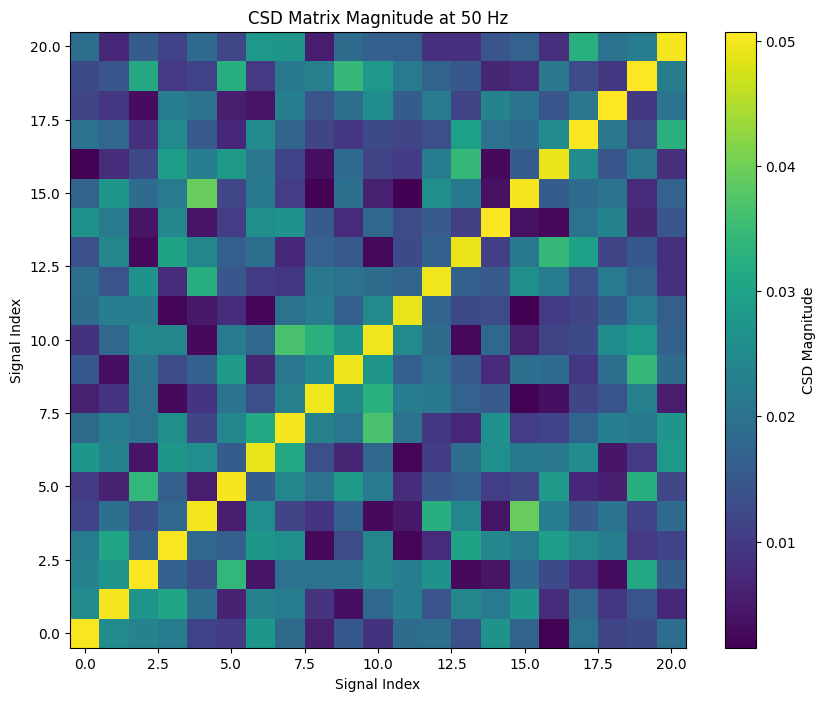

In [1]:
import numpy as np
from scipy.signal import csd
import scipy
import matplotlib.pyplot as plt

def calculate_csd(signals, fs, nperseg):
    """
    Calculate the Cross Spectral Density (CSD) for given signals.

    Parameters:
        signals (list of np.ndarray): List of signals.
        fs (int): Sampling frequency in Hz.
        nperseg (int): Length of each segment for the CSD calculation.

    Returns:
        tuple: A dictionary containing frequency-specific CSD matrices and the corresponding frequencies.
    """
    num_signals = len(signals)
    csd_matrix = np.zeros((num_signals, num_signals), dtype=object)
    frequencies_csd = None

    for i in range(num_signals):
        for j in range(i, num_signals):  # Compute only upper triangle
            f, Pxy = csd(signals[i], signals[j], fs=fs, nperseg=nperseg, 
                         noverlap=int(0.9 * nperseg), window=scipy.signal.get_window("boxcar", nperseg))
            csd_matrix[i, j] = Pxy
            csd_matrix[j, i] = np.conj(Pxy)  # Symmetry: C_ij = conj(C_ji)
            if frequencies_csd is None:
                frequencies_csd = f  # Save frequencies

    # Create frequency-specific matrices
    csd_matrix_at_freq = {freq: np.zeros((num_signals, num_signals), dtype=complex) for freq in frequencies_csd}
    for freq_idx, freq in enumerate(frequencies_csd):
        for i in range(num_signals):
            for j in range(num_signals):
                csd_matrix_at_freq[freq][i, j] = csd_matrix[i, j][freq_idx]

    return csd_matrix_at_freq, frequencies_csd

def visualize_csd(csd_matrix_at_freq, frequencies_csd, selected_freq):
    """
    Visualize the magnitude of the Cross Spectral Density (CSD) matrix at a specific frequency.

    Parameters:
        csd_matrix_at_freq (dict): Frequency-specific CSD matrices.
        frequencies_csd (np.ndarray): Array of frequencies corresponding to the CSD.
        selected_freq (float): Frequency to visualize.
    """
    idx = np.argmin(np.abs(frequencies_csd - selected_freq))  # Find the closest frequency index
    csd_mag_at_selected_freq = np.abs(csd_matrix_at_freq[frequencies_csd[idx]])

    plt.figure(figsize=(10, 8))
    plt.imshow(csd_mag_at_selected_freq, cmap='viridis', origin='lower')
    plt.colorbar(label="CSD Magnitude")
    plt.title(f"CSD Matrix Magnitude at {selected_freq} Hz")
    plt.xlabel("Signal Index")
    plt.ylabel("Signal Index")
    plt.show()

# Parameters
num_signals = 21
fs = 1500  # Sampling frequency in Hz
duration = 1  # Duration in seconds
frequencies = np.linspace(0, 740, 74)  # 74 frequency components from 10 Hz to 740 Hz
nperseg = 30
selected_freq = 50  # Frequency to analyze

# Generate multitone signals
signals = []
t = np.linspace(0, duration, int(fs * duration), endpoint=False)  # Time array
for i in range(num_signals):
    signal = sum(np.sin(2 * np.pi * f * t + np.random.uniform(0, 2 * np.pi)) for f in frequencies)
    signal += np.random.normal(0, 0.5, len(t))  # Add noise
    signals.append(signal)

# Function call
csd_matrix_at_freq, frequencies_csd = calculate_csd(signals, fs, nperseg)

# Visualize the CSD at the selected frequency
visualize_csd(csd_matrix_at_freq, frequencies_csd, selected_freq)
